### Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a credit scoring of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.



<div class="alert alert-block alert-info">

# Table of Contents:
####    Step 1. Open the data file and have a look at the general information
####    Step 2. Data preprocessing:
#####            - Processing missing values
#####            - Data type replacement
#####            - Fixing additional data errors
#####            - Processing duplicates
#####            - Categorizing Data
#####            - Check duplicates
#####            - Table after preprocessing
####    Step 3. Answer data analysis questions
####    Step 4. General conclusion
    
    
</div>

### Step 1. Open the data file and have a look at the general information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
#import cufflinks as cf
import datetime as dt
from functools import reduce
from scipy import stats as st
import plotly.express as px
import scipy.stats as stats
import plotly.graph_objects as go
#import chart_studio.plotly as py
import usaddress



%matplotlib inline


#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected = True)
#cf.go_offline()

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")
        
        
    

In [2]:
# borrowers = pd.read_csv('credit_scoring_eng.csv') # Incorrect file path
borrowers = pd.read_csv('credit_scoring_eng.csv')

# First look at the table
borrowers.head(10)

#borrowers.info()
#borrowers.describe()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [3]:
display(borrowers.head(10))

display(borrowers.info())
display(borrowers.describe())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


None

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


#### Conclusions:

Use info(), describe() and head() to get a first look on the data and the statistics. 

* There are 21524 rows in the file, each represent a different purpose, prior to dropping duplicates.
* NaN values exist at days_employed and in total_income columns.

* purpose column contains many different strings which requires categorize. 
* days_emploted and total_income are real numbers and not integers.
* There are negetive values in children column (min value for the column is -1).
* education column needs to be converted to lowercase letters. 
* purpose column need to be converted to general categories of real estate, education, car, wedding. 

days_employed:
* There are negetive valuse in days_employed column (min value for the column is -18388)
* There are false valuse at day_employes column: the mean is 63046 (172 years) and also the median is negetive. 
* General thoughts: negetive days_employed will be converted to positive values. However, the difference between the different columns will remain uneasonable and make no sense.  
- Possible explantion: different errors in the data processing part, due to transfer of different datasets (where each counts in different method) to this data set. 
* This column is not reuired for this project purposes, and will not be futher analyzed unless required. 


### Step 2. Data preprocessing

### Processing missing values

In [4]:
# Missing values


# Find NaN the easy way
print('find null values following review comment')
print(borrowers.isnull().sum())
print('\n')

# Find NaN in relvant columns 
print('check for NaN values: original code')
print("the number of purpose null is:", borrowers.purpose.isnull().sum())
print("the number of children null is:", borrowers.children.isnull().sum())
print("the number of days_employed null is:", borrowers.days_employed.isnull().sum())
print("the number of family_status null is:", borrowers.family_status.isnull().sum())
print("the number of family_status_id null is:", borrowers.family_status_id.isnull().sum())
print("the number of debt null is:", borrowers.debt.isnull().sum())
print("the number of total_income null is:", borrowers.total_income.isnull().sum())

# replacing NaN with median value for total_income 
total_income_median = borrowers.total_income.median() # find median
borrowers.total_income = borrowers.total_income.fillna(value = total_income_median) # replace NaN with median

# replacing Nan with mean value for days_employed
days_employed_mean = borrowers.days_employed.mean() # find mean
borrowers.days_employed = borrowers.days_employed.fillna(value = days_employed_mean) # replace NaN with mean

# Check 
print('\ncheck corrections:')
print("the number of days_employed null is:", borrowers.days_employed.isnull().sum())
print("the number of total_income null is:", borrowers.total_income.isnull().sum())


find null values following review comment
children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


check for NaN values: original code
the number of purpose null is: 0
the number of children null is: 0
the number of days_employed null is: 2174
the number of family_status null is: 0
the number of family_status_id null is: 0
the number of debt null is: 0
the number of total_income null is: 2174

check corrections:
the number of days_employed null is: 0
the number of total_income null is: 0


### Conclusion

- Blank fill explanation:
For total_income: blank were filled using median, as there is no normal distribution (following the analysis stage).
For days_employed: blank were filled with mean, this following the assumption of high variability of people's age and the date they were entered the banking data. 


### Data type replacement


In [5]:
# look for relevant columns to convert from float to int
# print(borrowers.info())


# convert total_income to int
borrowers.total_income = borrowers.total_income.astype('int')

# convert days_employed to int 
borrowers.days_employed = borrowers.days_employed.astype('int')


# explanation: used the astype method as was intoruced in the online platform.

###  Fixing additional data errors

Following the analysis workflow, addidional errors were notice and corrected: 

- 'children': change value -1 to value  1 
- 'children': change value 20 to value  2 
- 'days_employed': change negetive values to positive values 

In [6]:
# change values in children columns:

print('value counts in children column before corrections:')
print(borrowers['children'].value_counts())

# change from -1 to 1:
borrowers['children'].replace({-1: 1}, inplace=True)
# change from 20 to 2: 
borrowers['children'].replace({20: 2}, inplace=True)

print('\nvalue counts in children column after corrections:')
print(borrowers['children'].value_counts())


# change negetive values to positive values in days_employed columns
borrowers['days_employed'] = borrowers['days_employed'].abs()

value counts in children column before corrections:
 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

value counts in children column after corrections:
0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64


### Conclusion

* Data should be revised using info() to make sure columns are in the desired type.

* 0_children accounts for the majority of the data. 

### Processing duplicates

In [7]:
# at this stage, many duplicates were found for each column, therefore, duplicates were dropped after cleaning.

# convert education column to lowercase 
borrowers.education = borrowers.education.str.lower()

### Conclusion

- correcting duplicates demands careful approach. 
- Final drop of duplicates should be done at the final part of the preprocessing.


### Categorizing Data

Important note: 
purpose column was the only one catgorized for the original table. This was done in order not to lose imoprtant data on each indevidual and its personal characteristics. 

In the following stages, additonal categorization was done in order to be tailored to the specific analysis.

In [8]:
import nltk
from nltk.stem import SnowballStemmer 
english_stemmer = SnowballStemmer('english')


#-----Categorizing purpose column -----#

# check the number of unique values in purpose column
print('Number of unique values in purpose column:', len(borrowers.purpose.unique()))


# PRELIMINARY CLEANING:
# Using the stemmming methods to narrow the purpose column categories    
 
    
for i in borrowers.purpose:
    
    for word in i.split(" "):
        stemmed_word = english_stemmer.stem(word)
        if stemmed_word == 'car':
             borrowers.purpose.replace(i, "car", inplace = True)   
                
        if stemmed_word == 'property' or stemmed_word == 'house' or stemmed_word == 'real' or stemmed_word == 'estate':
            borrowers.purpose.replace(i, "real_estate", inplace = True)  
            
        if stemmed_word == 'educ' or stemmed_word == 'university' or stemmed_word == 'college':
             borrowers.purpose.replace(i, "education", inplace = True)  
                
# check prelimnary cleaning 
print('\nNumber of unique values in purpose column following Stemming:', len(borrowers.purpose.unique()))


# SECONDERY CLEANING
# Tokenize in order to split the remaining strings and using a loop for the final categorization

for row in borrowers.purpose:
    words = nltk.word_tokenize(row)
    for word in words:
        if word == 'house' or word == 'real' or word == 'property' or word == 'housing':
            borrowers.purpose.replace(row, "real_estate", inplace = True)
        
        if word == 'university' or word == 'college':
            borrowers.purpose.replace(row, "education", inplace = True)
            
        if word == 'wedding':
            borrowers.purpose.replace(row, "wedding", inplace = True)
        

# check secondery cleaning        
print('\nNumber of unique values in purpose column following tokenize:', len(borrowers.purpose.unique()))
print('\nUnique values for purpose column:', (borrowers.purpose.unique()))


Number of unique values in purpose column: 38

Number of unique values in purpose column following Stemming: 17

Number of unique values in purpose column following tokenize: 4

Unique values for purpose column: ['real_estate' 'car' 'education' 'wedding']


In [9]:
## Additional observations

purpose_counts = borrowers.purpose.value_counts()
print(purpose_counts)
print('\nloans for real_estate purpose responsible for {:.1%} of the data'.format(purpose_counts[0]/(purpose_counts.sum())))



real_estate    10840
car             4315
education       4022
wedding         2348
Name: purpose, dtype: int64

loans for real_estate purpose responsible for 50.4% of the data


### Conclusion

### Check duplicates


In [10]:
# initial table shape before dropping duplicates
print(borrowers.shape)

# a list of column names in order to drop duplicates.
columns_names = ['children', 'days_employed', 'dob_years', 'education', 'education_id', 'family_status', 'family_status_id','gender', 'income_type', 'debt','total_income','purpose']

print("The number of duplicates is", borrowers.duplicated(subset = columns_names).sum())


#drop duplicates
borrowers = borrowers.drop_duplicates(subset = columns_names)


#check drop
print(borrowers.shape)



(21525, 12)
The number of duplicates is 405
(21120, 12)



* Had a rough time with duplicated issue: some duplicated will appear before preprocessing and some will appear after and due to categorization (if categorization is over generlized) 
    
* 405 duplicates account for a minor percent of the data, assume it is acceptable. 

</div>

### Table after preprocessing

In [11]:
borrowers.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620,real_estate
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932,car
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341,real_estate
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820,education
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,25378,wedding
5,0,926,27,bachelor's degree,0,civil partnership,1,M,business,0,40922,real_estate
6,0,2879,43,bachelor's degree,0,married,0,F,business,0,38484,real_estate
7,0,152,50,secondary education,1,married,0,M,employee,0,21731,education
8,2,6929,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337,wedding
9,0,2188,41,secondary education,1,married,0,M,employee,0,23108,real_estate


### Step 3. Answer these questions

#### - Is there a relation between having kids and repaying a loan on time?

In [12]:
## check value counts distrubution for categorization 
#print('value counts for children column:\n', borrowers['children'].value_counts())


#copying to a new table for children column analysis
borrowers_children_category = borrowers.copy() # copy table

# categories: 0 - no children; 1-2 children; 3+ children
for i in borrowers_children_category.children:
    if i == 0:
        borrowers_children_category.children.replace(i, "0", inplace = True)
    if i == 1 or i == 2:
        borrowers_children_category.children.replace(i, "1-2", inplace = True)
    if i == 3 or i == 4 or i == 5:
        borrowers_children_category.children.replace(i, "3+", inplace = True)

        
# check new classification        
#print('\ncheck value counts after classification:\n', borrowers_children_category['children'].value_counts())        
        
# Creating a pivot_table for analysis
data_pivot_children = borrowers_children_category.pivot_table(index='children', values='total_income', columns='debt', aggfunc='count') 

# Change the 0 & 1 velus of the debt data to not_defult and defult
data_pivot_children = data_pivot_children.rename(columns = {0: 'no_defult', 1: 'defult'}, inplace = False)

# change NaN values to 0 
data_pivot_children.defult = data_pivot_children.defult.fillna(value = 0)

# Creating a total column for percetnage calculation
data_pivot_children['total'] = data_pivot_children['no_defult'] + data_pivot_children['defult']

# calculating defult percentage 
data_pivot_children['defult_percentage'] = (data_pivot_children['defult'] / data_pivot_children['total']).round(4)*100

# sort table
data_pivot_children.sort_values('defult_percentage', ascending = False)


print('\nFinal table after classification for children category:\n')
data_pivot_children

#print('\nFinal analysis statistics::\n')
#data_pivot_children.describe()



Final table after classification for children category:



debt,no_defult,defult,total,defult_percentage
children,,,,
0,12768,1061,13829,7.67
1-2,6266,647,6913,9.36
3+,347,31,378,8.20


### Conclusion

* mean: 8.41;
std: 0.86;
median: 8.2


* Based on the pivot table, there is no significant evidence for a trend between the number of children and defult a loan. 
 
* children counts can be a very sensitive issue, therfore it is better to not over-generlise the data. Thefore, the catagory was divided to 3 groups rather then children / no children. 

#### - Is there a relation between marital status and repaying a loan on time?

In [13]:
## for the table with people having children 

# Creating a pivot_table with family_status as the examined category
data_pivot_marital = borrowers.pivot_table(index='family_status', values='children', columns='debt', aggfunc='count') 

# Change the 0 & 1 velus of the debt data to not_defult and defult
data_pivot_marital = data_pivot_marital.rename(columns = {0: 'no_defult', 1: 'defult'}, inplace = False)

# Creating a total column for percetnage calculation
data_pivot_marital['total'] = data_pivot_marital['no_defult'] + data_pivot_marital['defult']

# calculating defult percentage 
data_pivot_marital['defult_percentage'] = (data_pivot_marital['defult'] / data_pivot_marital['total']).round(4)*100

# sort table
data_pivot_marital.sort_values('defult_percentage', ascending = False)

#print(data_pivot_marital)
#data_pivot_marital.describe()

debt,no_defult,defult,total,defult_percentage
family_status,,,,
unmarried,2510,274,2784,9.84
civil partnership,3736,388,4124,9.41
married,11147,929,12076,7.69
divorced,1108,85,1193,7.12
widow / widower,880,63,943,6.68


### Conclusion

* mean: 8.14; std: 1.4; median: 7.69

* The percentage of married people who defult a loan is 7.59, at the center of the sorted by deafult rate results, and within the 1 std range. Therefore, there is no significant correlation between marital status and defult.

#### - Is there a relation between income level and repaying a loan on time?

count     21120.000000
mean      26486.787595
std       15801.587115
min        3306.000000
25%       17089.000000
50%       23202.000000
75%       31512.500000
max      362496.000000
Name: total_income, dtype: float64

number of total_income under 50k: 19800
total_income under 50k in %:: 93.8%

total_income_histogram:


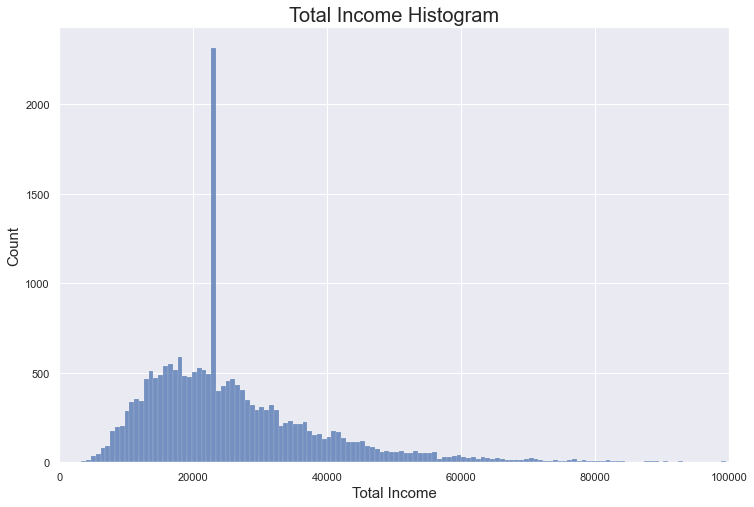

23202    1770
19552       7
23344       6
22705       5
15835       5
Name: total_income, dtype: int64

In [32]:
#total_income analysis

# part 1 - check statistics 

#total_income general data 
print(borrowers['total_income'].describe())


#print('\nnumber of total_income under 50k:', borrowers[borrowers.total_income < 50000].count()['total_income'])
print('\nnumber of total_income under 50k:', borrowers[borrowers.total_income < 50000].count()['total_income'])
print('total_income under 50k in %:: {:.1%}'.format((borrowers[borrowers.total_income < 50000].count()['total_income'])/ len(borrowers)))

#histogram
print('\ntotal_income_histogram:')
#total_income_hist = borrowers.hist(column='total_income', bins=25, grid=False, figsize=(8,4), color='#86bf91', zorder=2, rwidth=0.9)


sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(data=borrowers, x="total_income", bins = 500)
plt.xlim(0, 100000)
plt.xlabel('Total Income', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Total Income Histogram', fontsize = 20)
#plt.xticks(rotation = 30)
plt.show()


display(borrowers.total_income.sort_values(ascending = False).value_counts().head(5))

##### Observations

* The histogram presents a long tail distribution, supporting the dicision to replace NaN values with median rather then mean. 
* There is a significant std value.  
* More weight in the analysis should be towards 50000 and under, which accounts for over 90% of the data.
* The outliar bar at 23202 represent the median used to fill the missing values of this column.

In [15]:
# part 2 - divide the data acording to observations: 0-10K 10-20K 20-30K, 30-40K, 50K+ 

borrowers_income = borrowers.copy()

for row in borrowers_income.total_income:
    if row <= 10000:
        borrowers_income.total_income.replace(row, "0-10K", inplace = True)
    if 10000 < row <= 20000:
        borrowers_income.total_income.replace(row, "10K-20K", inplace = True)
    if 20000 < row <= 30000:
        borrowers_income.total_income.replace(row, "20K-30K", inplace = True)
    if 30000 < row <= 40000:
        borrowers_income.total_income.replace(row, "40K-50K", inplace = True)        

    borrowers_income.total_income.replace(row, "50K+", inplace = True)




In [16]:
# pivot table for analysis


# Creating a pivot_table with family_status as the examined category
data_pivot_income = borrowers_income.pivot_table(index='total_income', values='children', columns='debt', aggfunc='count') 

# Change the 0 & 1 velus of the debt data to not_defult and defult
data_pivot_income = data_pivot_income.rename(columns = {0: 'no_defult', 1: 'defult'}, inplace = False)

# change NaN values to 0 
data_pivot_income.defult = data_pivot_income.defult.fillna(value = 0)
data_pivot_income.no_defult = data_pivot_income.no_defult.fillna(value = 0)


# Creating a total column for percetnage calculation
data_pivot_income['total'] = data_pivot_income['no_defult'] + data_pivot_income['defult']

# calculating defult percentage 
data_pivot_income['defult_percentage'] = (data_pivot_income['defult'] / data_pivot_income['total']).round(4)*100

print('\nFinal table after classification for total_income category:\n')
data_pivot_income.sort_values('defult_percentage', ascending = False) # sort table


#data_pivot_income.describe()


Final table after classification for total_income category:



debt,no_defult,defult,total,defult_percentage
total_income,,,,
20K-30K,7136,695,7831,8.87
10K-20K,5893,550,6443,8.54
40K-50K,2865,242,3107,7.79
50K+,2618,194,2812,6.90
0-10K,869,58,927,6.26


 ### Conclusion

mean: 7.67.14; std: 1.09; median: 7.79

* No trend between the total income and the default percentage rate.
* People with the lowest income are less likely to defult on a loan.
* People with the highest income still fall within a 1 std from the mean.

#### - How do different loan purposes affect on-time repayment of the loan?

In [17]:
## for the table with people having children 

# Creating a pivot_table with family_status as the examined category
data_pivot_purpose = borrowers.pivot_table(index='purpose', values='children', columns='debt', aggfunc='count') 

# Change the 0 & 1 velus of the debt data to not_defult and defult
data_pivot_purpose = data_pivot_purpose.rename(columns = {0: 'no_defult', 1: 'defult'}, inplace = False)

# Creating a total column for percetnage calculation
data_pivot_purpose['total'] = data_pivot_purpose['no_defult'] + data_pivot_purpose['defult']

# calculating defult percentage 
data_pivot_purpose['defult_percentage'] = (data_pivot_purpose['defult'] / data_pivot_purpose['total']).round(4)*100


print('\nFinal table after classification for purpose category:\n')
data_pivot_purpose.sort_values('defult_percentage', ascending = False) # sort table

#data_pivot_purpose.describe() 


Final table after classification for purpose category:



debt,no_defult,defult,total,defult_percentage
purpose,,,,
car,3870,402,4272,9.41
education,3594,370,3964,9.33
wedding,2120,186,2306,8.07
real_estate,9797,781,10578,7.38


### Conclusion

* mean: 8.54; std: 0.99; median: 8.7

* Even though the table shows default on a loan is more likely to happen due to car loan and lower probability due to real estate loan, both values are within 1 std from the mean and. Therfore, no statistical conclusion can be stated.

### Step 4. General conclusion

* No signifcant insights regarding different catagories and loan defaults rates were found.


* In order to have more rubost conclusions, data should be analysed using different methods, for example, we might try to aim at different age groups, and within these groups - try to compare the different categories and the rate of default.


* Categorization - it is important not to over generlize the data in order to keep important data.


* Regarding code scripting: It is crucial crucial to copy the final table for each analysis, as each categorization and change in the column types/ name will cause errors in the data, and some scripts may not work after the 1st run. 



### Project Readiness Checklist

Put 'x' in the completed points. Then press Shift + Enter.

- [x]  file open;
- [x]  file examined;
- [x]  missing values defined;
- [x]  missing values are filled;
- [x]  an explanation of which missing value types were detected;
- [x]  explanation for the possible causes of missing values;
- [x]  an explanation of how the blanks are filled;
- [x]  replaced the real data type with an integer;
- [x]  an explanation of which method is used to change the data type and why;
- [x]  duplicates deleted;
- [x]  an explanation of which method is used to find and remove duplicates;
- [x]  description of the possible reasons for the appearance of duplicates in the data;
- [x]  data is categorized;
- [x]  an explanation of the principle of data categorization;
- [x]  an answer to the question "Is there a relation between having kids and repaying a loan on time?";
- [x]  an answer to the question " Is there a relation between marital status and repaying a loan on time?";
- [x]  an answer to the question " Is there a relation between income level and repaying a loan on time?";
- [x]  an answer to the question " How do different loan purposes affect on-time repayment of the loan?"
- [x]  conclusions are present on each stage;
- [x]  a general conclusion is made.